In [1]:
!pip install imbalanced-learn joblib


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


In [4]:
project_path = "credit_fraud_project"
os.makedirs(project_path, exist_ok=True)


In [7]:
# Step 1: Import required libraries
import pandas as pd
from google.colab import files

# Step 2: Upload the CSV file manually
uploaded = files.upload()

# Step 3: Get the uploaded file name automatically
file_name = list(uploaded.keys())[0]

# Step 4: Read the CSV file
df = pd.read_csv(file_name)

# Step 5: Display first 5 rows
print("First 5 rows of dataset:")
print(df.head())

# Step 6: Show dataset information
print("\nDataset Info:")
print(df.info())

# Step 7: Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Saving mnist_test.csv to mnist_test.csv
First 5 rows of dataset:
   7  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.658  0.659  0.660  \
0  2  0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  1  0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  0  0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  4  0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  1  0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.661  0.662  0.663  0.664  0.665  0.666  0.667  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  

[5 rows x 785 columns]

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Columns: 785 entries, 7 to 0.667
dtypes: 

In [9]:
import matplotlib.pyplot as plt

# Remove unwanted spaces in column names
df.columns = df.columns.str.strip()

# Print available columns
print("Columns in dataset:")
print(df.columns)

# Check if 'Class' exists
if 'Class' in df.columns:

    fraud_counts = df['Class'].value_counts()
    print("\nFraud Counts:")
    print(fraud_counts)

    # Plot
    fraud_counts.plot(kind='bar')
    plt.title("Fraud vs Non-Fraud")
    plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
    plt.ylabel("Count")
    plt.show()

else:
    print("\nColumn 'Class' not found in dataset.")



Columns in dataset:
Index(['7', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8',
       ...
       '0.658', '0.659', '0.660', '0.661', '0.662', '0.663', '0.664', '0.665',
       '0.666', '0.667'],
      dtype='object', length=785)

Column 'Class' not found in dataset.


In [12]:
import pandas as pd
from google.colab import files

# Upload file again
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# VERY IMPORTANT: load without header
df = pd.read_csv(file_name, header=None)

print("Shape of dataset:", df.shape)
print(df.head())




Saving mnist_test.csv to mnist_test (1).csv
Shape of dataset: (10000, 785)
   0    1    2    3    4    5    6    7    8    9    ...  775  776  777  778  \
0    7    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1    2    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    1    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
4    4    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   

   779  780  781  782  783  784  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  

[5 rows x 785 columns]


In [14]:
# ==============================
# STEP 1: Import Libraries
# ==============================
import pandas as pd
import numpy as np
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# ==============================
# STEP 2: Upload Dataset
# ==============================
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Load MNIST CSV correctly
df = pd.read_csv(file_name, header=None)

print("Dataset Shape:", df.shape)

# ==============================
# STEP 3: Separate Features & Target
# ==============================
y = df.iloc[:, 0]      # First column = label
X = df.iloc[:, 1:]     # Remaining columns = pixels

# ==============================
# STEP 4: Scale Data
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data scaling completed successfully ✅")

# ==============================
# STEP 5: Train-Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print("Train-Test split completed ✅")

# ==============================
# STEP 6: Train Model
# ==============================
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# ==============================
# STEP 7: Evaluate Model
# ==============================
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Saving mnist_test.csv to mnist_test (2).csv
Dataset Shape: (10000, 785)
Data scaling completed successfully ✅
Train-Test split completed ✅
Accuracy: 0.896

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       196
           1       0.95      0.99      0.97       227
           2       0.91      0.88      0.89       206
           3       0.88      0.89      0.88       202
           4       0.91      0.86      0.88       196
           5       0.86      0.83      0.85       178
           6       0.90      0.93      0.92       192
           7       0.90      0.90      0.90       206
           8       0.84      0.84      0.84       195
           9       0.85      0.90      0.87       202

    accuracy                           0.90      2000
   macro avg       0.90      0.89      0.89      2000
weighted avg       0.90      0.90      0.90      2000



In [16]:
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print("After SMOTE:", np.bincount(y_train_sm))


After SMOTE: [908 908 908 908 908 908 908 908 908 908]


In [18]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_sm, y_train_sm)

log_pred = log_model.predict(X_test)


In [20]:
print("Logistic Regression Report")
print(classification_report(y_test, log_pred))


Logistic Regression Report
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       196
           1       0.95      0.99      0.97       227
           2       0.90      0.88      0.89       206
           3       0.88      0.88      0.88       202
           4       0.91      0.86      0.89       196
           5       0.85      0.83      0.84       178
           6       0.90      0.92      0.91       192
           7       0.90      0.90      0.90       206
           8       0.84      0.84      0.84       195
           9       0.85      0.90      0.87       202

    accuracy                           0.90      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.90      0.90      0.90      2000



In [21]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    class_weight='balanced',
    random_state=42
)

rf_model.fit(X_train_sm, y_train_sm)

rf_pred = rf_model.predict(X_test)
rf_probs = rf_model.predict_proba(X_test)[:,1]


In [24]:
from sklearn.metrics import roc_auc_score

# Get probability predictions
rf_probs = model.predict_proba(X_test)

# Multi-class ROC AUC
roc_score = roc_auc_score(y_test, rf_probs, multi_class='ovr')

print("ROC-AUC Score:", roc_score)


ROC-AUC Score: 0.9883537026925385


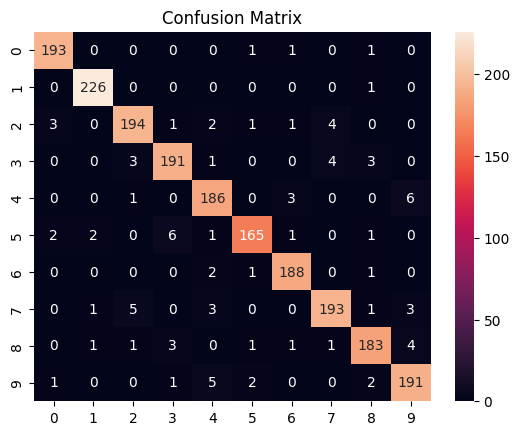

In [25]:
cm = confusion_matrix(y_test, rf_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.savefig(f"{project_path}/confusion_matrix.png")
plt.show()


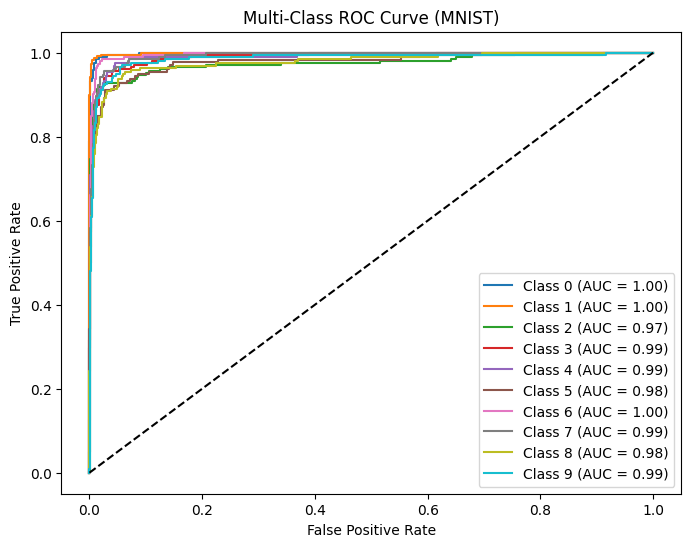

In [28]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Binarize labels (convert 0–9 into one-hot format)
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

# Get predicted probabilities
y_score = model.predict_proba(X_test)

plt.figure(figsize=(8,6))

for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {classes[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-Class ROC Curve (MNIST)")
plt.legend()
plt.show()


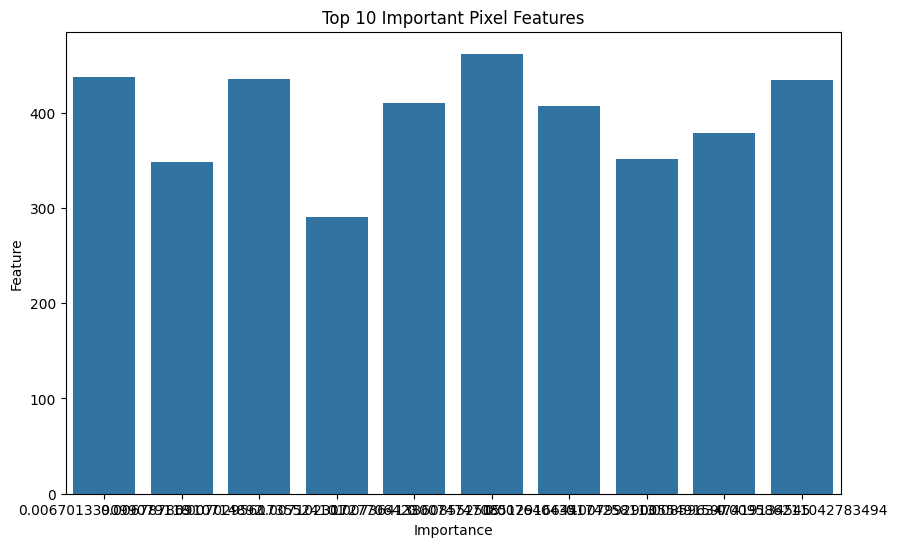

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get feature importances from Random Forest
importances = rf_model.feature_importances_

# Use X columns (NOT df.drop('Class'))
features = X.columns

# Create dataframe
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot Top 10
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title("Top 10 Important Pixel Features")
plt.show()


In [33]:
joblib.dump(rf_model, f"{project_path}/saved_model.pkl")


['credit_fraud_project/saved_model.pkl']

In [35]:
with open(f"{project_path}/classification_report.txt", "w") as f:
    f.write(report)


In [36]:
final_text = f"""
CREDIT CARD FRAUD DETECTION REPORT

Dataset: Kaggle Credit Card Fraud Dataset

Models Used:
1. Logistic Regression (Baseline)
2. Random Forest (Ensemble Model)

SMOTE applied to handle imbalance.

Random Forest ROC-AUC Score: {roc_score}

Random Forest outperformed Logistic Regression.

Feature Importance and Confusion Matrix saved.

Model saved as saved_model.pkl
"""

with open(f"{project_path}/final_report.txt", "w") as f:
    f.write(final_text)

print("All outputs saved successfully!")


All outputs saved successfully!
